In [129]:
#import all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [130]:
df = pd.read_csv(r'stock_data.csv')

In [131]:
df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [132]:
df['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

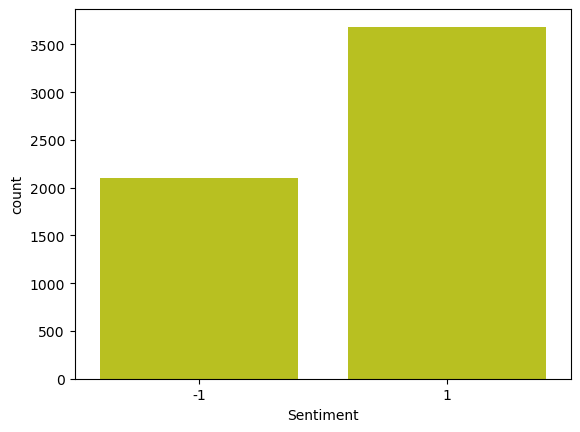

In [133]:
sns.countplot(x='Sentiment',data=df,color='#D0DA07')

In [134]:
#check null value
null_value = df.isnull().sum()
for feature,count in null_value.items():
    if count >1:
        print(feature,"is having null value")
    else:
        print(feature,"is not having null value")

Text is not having null value
Sentiment is not having null value


In [135]:
word_list =list()
for i in range(len(df)):
    temp = df.Text[i].split()
    for k in temp:
        word_list.append(k)

In [136]:
from collections import Counter
counter= Counter(word_list)
countedWordDict = dict(counter)
sortedworddic = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedworddic 


[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324),
 ('with', 324),
 ('user', 294),
 ('short', 293),
 ('that', 279),
 ('like', 268),
 ('are', 261),
 ('out', 255),
 ('over', 254),
 ('as', 240),
 ('but', 238),
 ('long', 225),
 ('volume', 218),
 ('has', 212),
 ('day', 208),
 ('BAC', 202),
 ('above', 201),
 ('here', 199),
 ('not', 196),
 ('if', 194),
 ('you', 193),
 ('GOOG', 191),
 ('some', 187),
 ('have', 186),
 ('&', 185),
 ('my', 184),
 ('The', 180),
 ('good', 179),
 ('more', 171),
 ('today', 164),
 ('stock', 164),
 ('still', 163),
 ('move', 158),
 ('now', 158),
 ('new', 154),
 ('back', 151),
 ('off', 150),
 ('nice', 149),
 ('we', 145),
 ('down', 145),
 ('by', 145),
 ('buy', 143),
 ('after', 142),
 ('next', 142),
 ('see', 141),
 ('or', 138),
 ('watc

In [137]:
word = pd.DataFrame(sortedworddic)

In [138]:
Word = word.rename(columns={0: 'word',1:'Count'})

In [139]:
Word.columns

Index(['word', 'Count'], dtype='object')

In [140]:
Word

,word,Count
0,the,1796
1,to,1668
2,a,1280
3,on,1032
4,of,944
...,...,...
17819,"#Sensex,",1
17820,2%;,1
17821,factors,1
17822,D-Street,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'the'),
  Text(1, 0, 'to'),
  Text(2, 0, 'a'),
  Text(3, 0, 'on'),
  Text(4, 0, 'of'),
  Text(5, 0, 'in'),
  Text(6, 0, 'AAP'),
  Text(7, 0, 'for'),
  Text(8, 0, 'and'),
  Text(9, 0, 'is'),
  Text(10, 0, '-'),
  Text(11, 0, 'at'),
  Text(12, 0, 'this'),
  Text(13, 0, 'it'),
  Text(14, 0, 'I'),
  Text(15, 0, 'up'),
  Text(16, 0, 'user:'),
  Text(17, 0, 'from'),
  Text(18, 0, 'will'),
  Text(19, 0, 'be'),
  Text(20, 0, 'with'),
  Text(21, 0, 'user'),
  Text(22, 0, 'short'),
  Text(23, 0, 'that'),
  Text(24, 0, 'like'),
  Text(25, 0, 'are'),
  Text(26, 0, 'out'),
  Text(27, 0, 'over'),
  Text(28, 0, 'as'),
  Text(29, 0, 'but')])

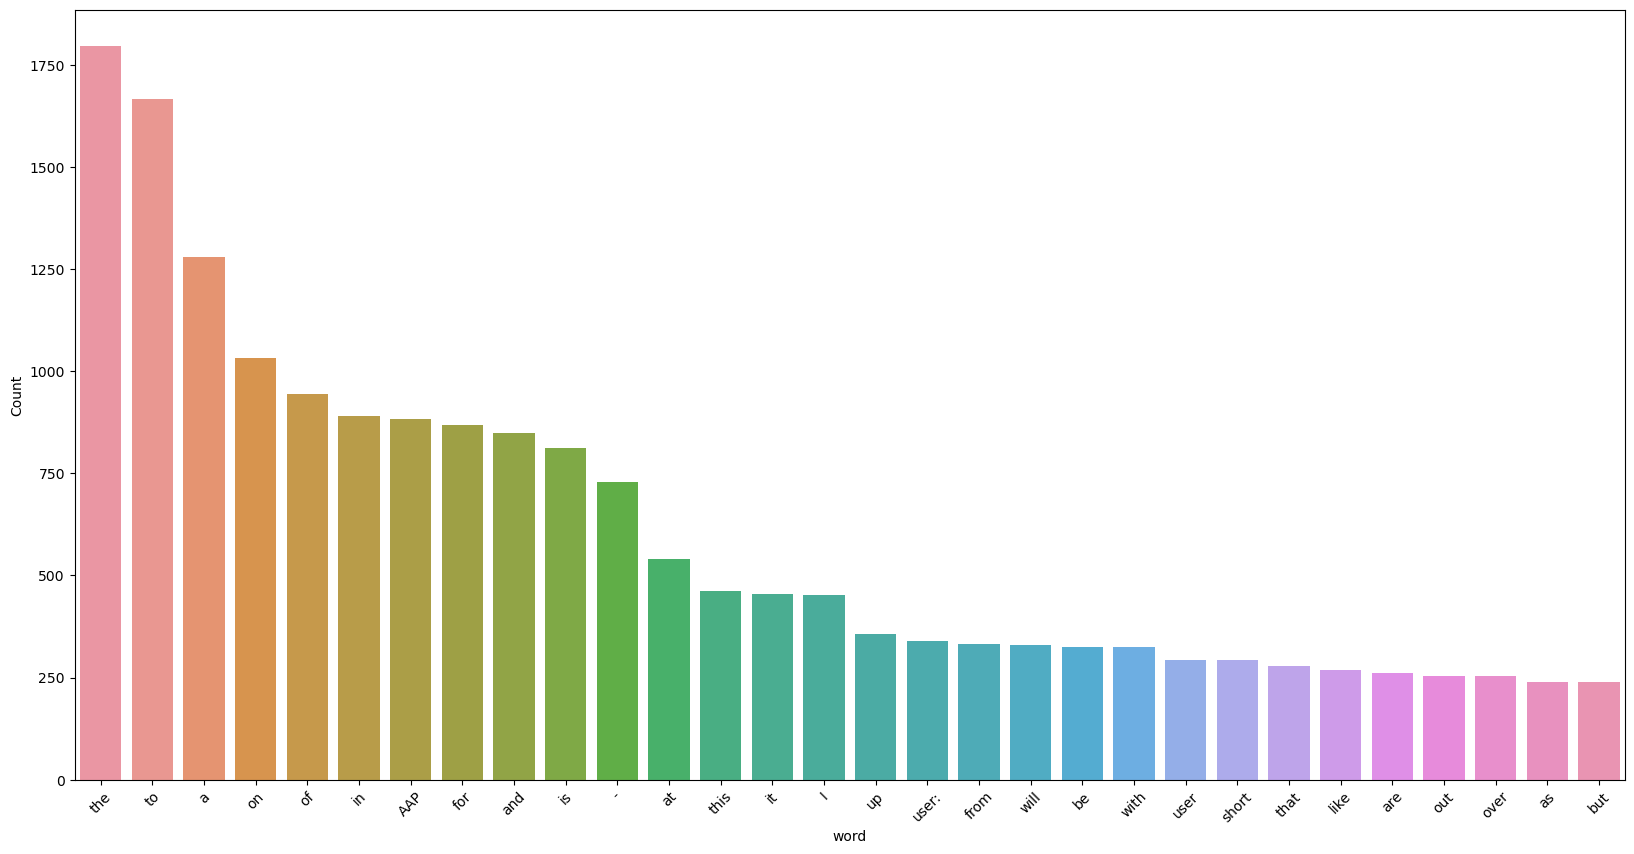

In [141]:
plt.figure(figsize=(20,10))
sns.barplot(x='word',y='Count',data=Word.nlargest(30,'Count'))
plt.xticks(rotation=45)

In [142]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words('english'))

In [143]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [149]:
import nltk

In [152]:
textList = []
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    text = text.lower()
    text = text.split()
    text = [lemma.lemmatize(word) for word in text if not word in stopwordSet]
    text = ' '.join(text)
    textList.append(text)
    

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [154]:
cv = CountVectorizer(max_features=5001)

In [155]:
textList

['kicker watchlist xide tit soq pnk cpw bpz aj trade method method see prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user afraid short amzn looking like near monopoly ebooks infrastructure service',
 'mnta',
 'oi',
 'pgnx',
 'aap user current downtrend break otherwise short term correction med term downtrend',
 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 'assuming fcx open tomorrow trigger buy still much like setup',
 'really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm',
 'aap gamco arry haverty apple extremely cheap great video',
 'user maykiljil posted agree msft going higher possibly north',
 'momentum coming back etfc broke resistance solid volume friday ong set',
 'ha hitting mean resume targeting level',
 'user gameplan shot today liked trend break may c h break oc weekly tren

In [157]:
x = cv.fit_transform(textList).toarray()

In [158]:
pca = PCA(n_components=256) 
x = pca.fit_transform(x)  

In [160]:
y = df['Sentiment'].replace(-1,0)

In [161]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5786    0
5787    0
5788    1
5789    1
5790    1
Name: Sentiment, Length: 5791, dtype: int64

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [164]:
modelList = []
modelList.append(("LogisticReg",LogisticRegression()))
modelList.append(("GaussianNB",GaussianNB()))
modelList.append(("BernoulliNB",BernoulliNB()))
modelList.append(("DecisionTree",DecisionTreeClassifier()))
modelList.append(("RandomForest",RandomForestClassifier()))
modelList.append(("KNeighbors",KNeighborsClassifier(n_neighbors=5)))
modelList.append(("SVC",SVC()))
modelList.append(("XGB",XGBClassifier()))

In [165]:
def train_predict(x_train,x_test,y_train,y_test):
    for name, classifier in modelList:
        classifier.fit(x_train,y_train)
        y_pred = classifier.predict(x_test)
        print("{} Accuracy: {}".format(name,accuracy_score(y_test,y_pred)))

In [168]:
train_predict(x_train,x_test,y_train,y_test)


LogisticReg Accuracy: 0.7377049180327869
GaussianNB Accuracy: 0.6591889559965487
BernoulliNB Accuracy: 0.7006039689387403
DecisionTree Accuracy: 0.636755823986195
RandomForest Accuracy: 0.7213114754098361
KNeighbors Accuracy: 0.6997411561691113
SVC Accuracy: 0.7679033649698016
XGB Accuracy: 0.7515099223468508
